In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot

In [175]:
data = pd.read_csv('C:/Users/김건우/Desktop/UNIST/3학년 2학기/시계열분석(MGE)/tsla_price_data.csv')

<AxesSubplot:>

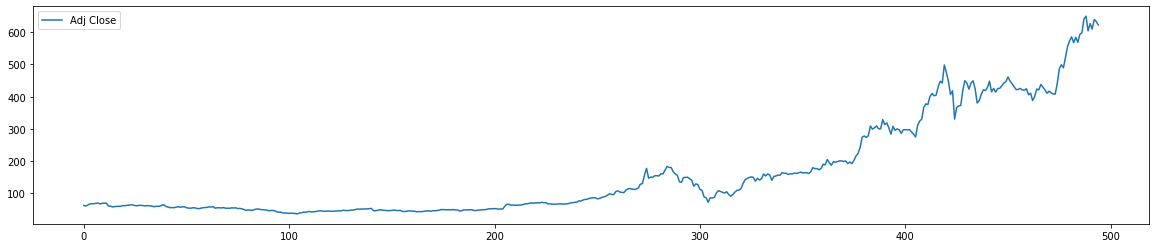

In [176]:
data.plot(figsize=(20,4))

In [177]:
return_data = pd.DataFrame()

In [178]:
return_data['daily_return'] = data['Adj Close'].apply(np.log).diff(periods=1).iloc[1:]

In [179]:
return_data = return_data.dropna(axis=0)

<AxesSubplot:>

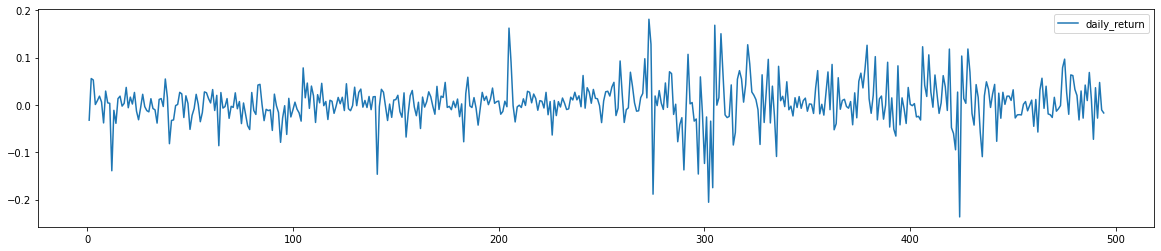

In [181]:
return_data.plot(figsize=(20,4))

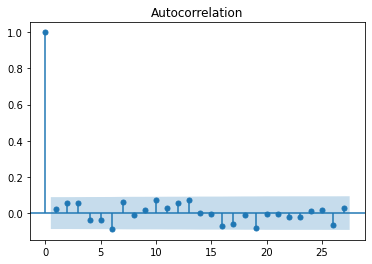

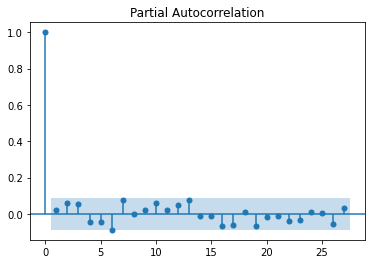

<Figure size 1440x864 with 0 Axes>

In [146]:
plot_acf(return_data)
plot_pacf(return_data)
plt.figure(figsize=(20,12))
plt.show()

In [182]:
arima_model = ARIMA(return_data, order=(6,0,6))
arimat_model_fit = arima_model.fit(trend='c',full_output=True, disp=1)
print(arimat_model_fit.summary())

C:\ana3\envs\t_f2.2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ana3\envs\t_f2.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.

                              ARMA Model Results                              
Dep. Variable:           daily_return   No. Observations:                  494
Model:                     ARMA(6, 6)   Log Likelihood                 831.088
Method:                       css-mle   S.D. of innovations              0.045
Date:                Sat, 19 Dec 2020   AIC                          -1634.176
Time:                        22:51:11   BIC                          -1575.341
Sample:                             0   HQIC                         -1611.078
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0047      0.002      2.404      0.016       0.001       0.009
ar.L1.daily_return    -0.6421      0.042    -15.408      0.000      -0.724      -0.560
ar.L2.daily_return  

<AxesSubplot:title={'center':'arima_Residual'}>

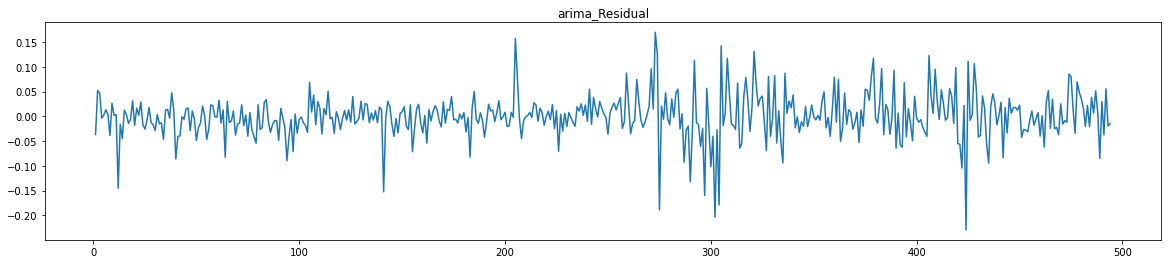

In [183]:
arimat_model_fit.resid.plot(figsize = (20, 4), title = 'arima_Residual')

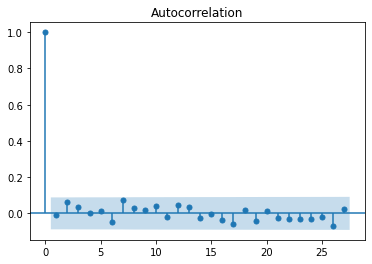

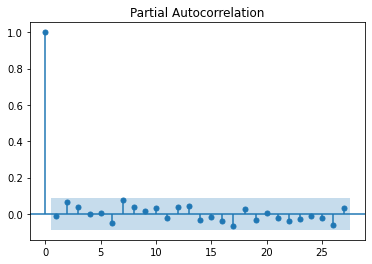

<Figure size 1440x864 with 0 Axes>

In [184]:
plot_acf(arimat_model_fit.resid)
plot_pacf(arimat_model_fit.resid)
plt.figure(figsize=(20,12))
plt.show()

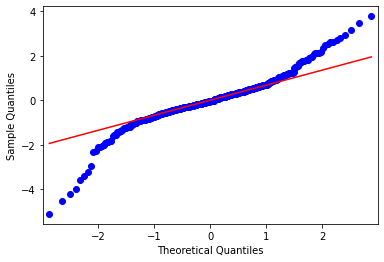

In [185]:
fig = qqplot(arimat_model_fit.resid, line='q', fit=True)

In [186]:
model_garch_1_1 = arch_model(return_data.daily_return[1:],mean='Constant',vol='GARCH',p=1,q=1)

In [187]:
results_garch_1_1 = model_garch_1_1.fit()
results_garch_1_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -859.9236684361776
Iteration:      2,   Func. Count:     18,   Neg. LLF: -859.9990962266609
Iteration:      3,   Func. Count:     29,   Neg. LLF: -859.999747862282
Iteration:      4,   Func. Count:     41,   Neg. LLF: -860.0003983263076
Iteration:      5,   Func. Count:     52,   Neg. LLF: -860.0010474038284
Iteration:      6,   Func. Count:     60,   Neg. LLF: -860.3064836359468
Iteration:      7,   Func. Count:     69,   Neg. LLF: -860.4953948586138
Iteration:      8,   Func. Count:     77,   Neg. LLF: -860.686021926596
Iteration:      9,   Func. Count:     84,   Neg. LLF: -860.71154292983
Iteration:     10,   Func. Count:     91,   Neg. LLF: -860.7408525079958
Iteration:     11,   Func. Count:    100,   Neg. LLF: -860.760913161146
Iteration:     12,   Func. Count:    108,   Neg. LLF: -860.7662714065893
Iteration:     13,   Func. Count:    115,   Neg. LLF: -860.7698659293393
Iteration:     14,   Func. Count:    121,   Neg. LLF: -8

C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:           daily_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                860.772
Distribution:                  Normal   AIC:                          -1713.54
Method:            Maximum Likelihood   BIC:                          -1696.74
                                        No. Observations:                  493
Date:                Sat, Dec 19 2020   Df Residuals:                      489
Time:                        22:56:21   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.9041e-03  1.919e-03      2.034  4.194e-02 [1.424e-04,7.666e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.9577e-04  1.198e-04      1.634      0.102 [-3.911e-05,4.307e-04]
alpha[1]       0.1193  6.647e-02      1.795  7.265e-02   [-1.096e-02,  0.250]
beta[1]        0.7834      0.105      7.449  9.390e-14      [  0.577,  0.990]
=============================================================================

Covariance estimator: robust
"""

<AxesSubplot:title={'center':'garch_Residual'}>

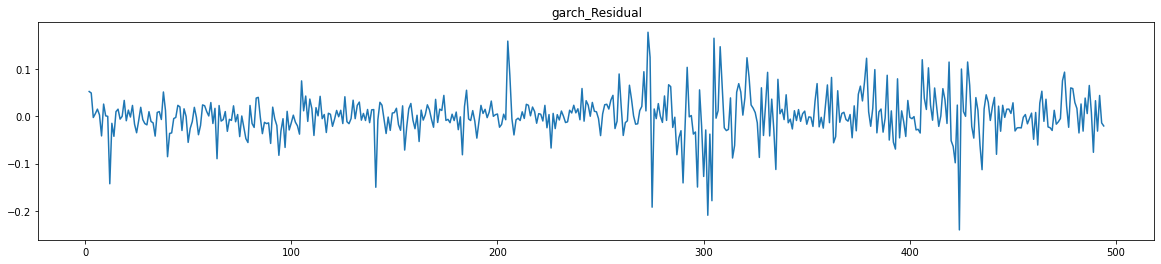

In [188]:
results_garch_1_1.resid.plot(figsize = (20, 4), title = 'garch_Residual')

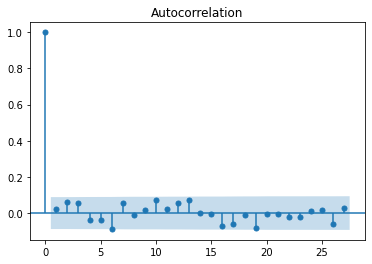

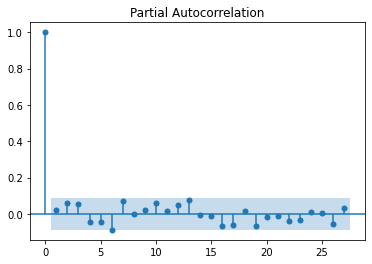

<Figure size 1440x864 with 0 Axes>

In [189]:
plot_acf(results_garch_1_1.resid)
plot_pacf(results_garch_1_1.resid)
plt.figure(figsize=(20,12))
plt.show()

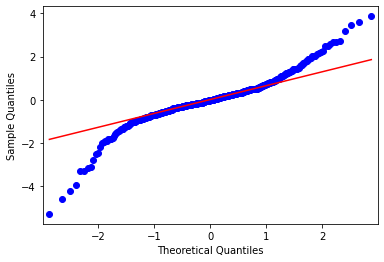

In [190]:
fig = qqplot(results_garch_1_1.resid, line='q', fit=True)

In [191]:
print(results_garch_1_1.aic, results_garch_1_1.bic)

-1713.5443058487774 -1696.7422691526067


In [257]:
model_garch_2_1 = arch_model(return_data.daily_return[1:],vol='GARCH',p=2,q=1)

In [258]:
results_garch_2_1 = model_garch_2_1.fit()
results_garch_2_1.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: -861.2784822025499
Iteration:      2,   Func. Count:     20,   Neg. LLF: -861.3449682987057
Iteration:      3,   Func. Count:     30,   Neg. LLF: -861.3450945981433
Iteration:      4,   Func. Count:     42,   Neg. LLF: -861.359151949478
Iteration:      5,   Func. Count:     55,   Neg. LLF: -861.3749421507285
Iteration:      6,   Func. Count:     66,   Neg. LLF: -862.3249241155805
Iteration:      7,   Func. Count:     77,   Neg. LLF: -862.3325248187255
Iteration:      8,   Func. Count:     86,   Neg. LLF: -863.4274878537833
Iteration:      9,   Func. Count:     94,   Neg. LLF: -864.2612509405074
Iteration:     10,   Func. Count:    102,   Neg. LLF: -864.4128224436367
Iteration:     11,   Func. Count:    110,   Neg. LLF: -864.4272153922739
Iteration:     12,   Func. Count:    118,   Neg. LLF: -864.4790367585629
Iteration:     13,   Func. Count:    125,   Neg. LLF: -864.5049401000292
Iteration:     14,   Func. Count:    132,   Neg. LLF

C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:           daily_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                864.505
Distribution:                  Normal   AIC:                          -1719.01
Method:            Maximum Likelihood   BIC:                          -1698.01
                                        No. Observations:                  493
Date:                Sun, Dec 20 2020   Df Residuals:                      488
Time:                        00:27:32   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.6178e-03  1.938e-03      2.382  1.721e-02 [8.184e-04,8.417e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2855e-04  2.696e-04      1.590      0.112 [-9.985e-05,9.570e-04]
alpha[1]       0.0605  3.634e-02      1.664  9.603e-02   [-1.074e-02,  0.132]
alpha[2]       0.1923      0.128      1.506      0.132   [-5.788e-02,  0.442]
beta[1]        0.5449      0.219      2.487  1.289e-02      [  0.115,  0.974]
=============================================================================

Covariance estimator: robust
"""

<AxesSubplot:title={'center':'garch_Residual'}>

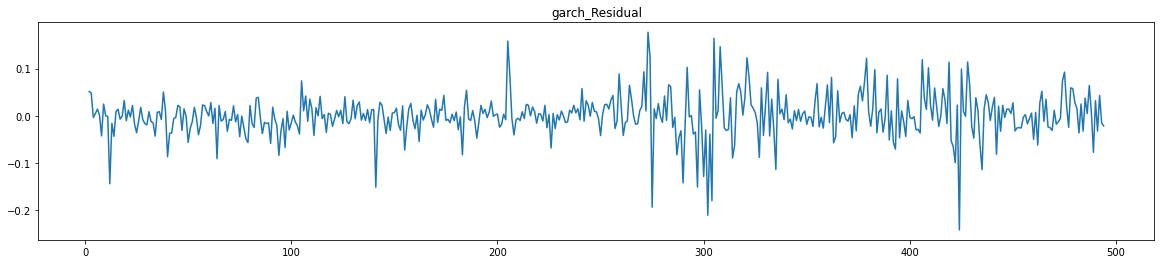

In [194]:
results_garch_2_1.resid.plot(figsize = (20, 4), title = 'garch_Residual')

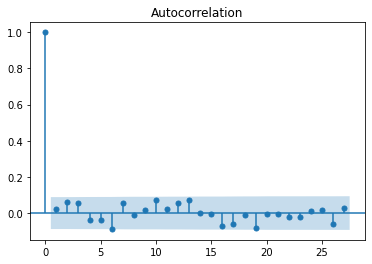

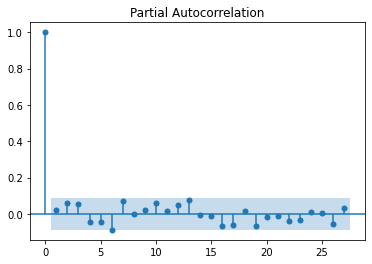

<Figure size 1440x864 with 0 Axes>

In [196]:
plot_acf(results_garch_2_1.resid)
plot_pacf(results_garch_2_1.resid)
plt.figure(figsize=(20,12))
plt.show()

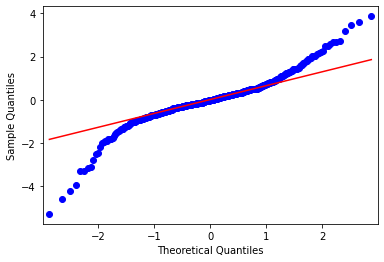

In [203]:
fig = qqplot(results_garch_2_1.resid, line='q', fit=True)

In [198]:
print(results_garch_2_1.aic, results_garch_2_1.bic)

-1719.0107535331335 -1698.00820766292


In [199]:
model_garch_1_2 = arch_model(return_data.daily_return[1:],mean='Constant',vol='GARCH',p=1,q=2)

In [200]:
results_garch_1_2 = model_garch_1_2.fit()
results_garch_1_2.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: -856.6700643054214
Iteration:      2,   Func. Count:     20,   Neg. LLF: -856.809291551981
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -856.8092926008726
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2


C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:           daily_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                856.809
Distribution:                  Normal   AIC:                          -1703.62
Method:            Maximum Likelihood   BIC:                          -1682.62
                                        No. Observations:                  493
Date:                Sat, Dec 19 2020   Df Residuals:                      488
Time:                        23:00:52   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.7634e-03  2.120e-03      1.775  7.589e-02 [-3.921e-04,7.919e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.0956e-04  1.989e-04      1.054      0.292 [-1.802e-04,5.993e-04]
alpha[1]       0.1000  7.131e-02      1.402      0.161   [-3.976e-02,  0.240]
beta[1]        0.4000      1.458      0.274      0.784      [ -2.458,  3.258]
beta[2]        0.4000      1.561      0.256      0.798      [ -2.660,  3.460]
=============================================================================

Covariance estimator: robust
"""

<AxesSubplot:title={'center':'garch_Residual'}>

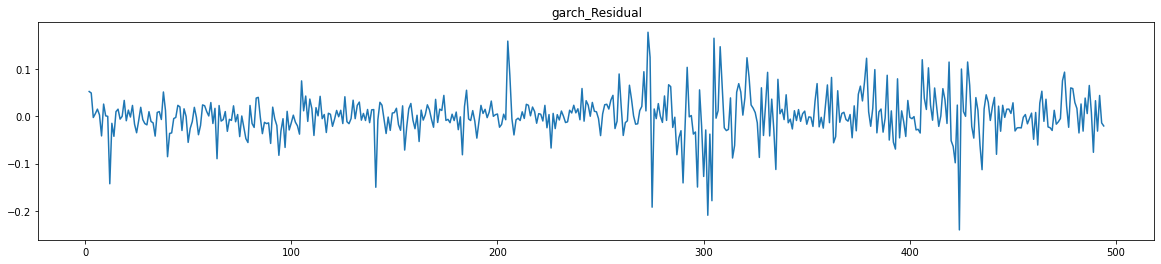

In [201]:
results_garch_1_2.resid.plot(figsize = (20, 4), title = 'garch_Residual')

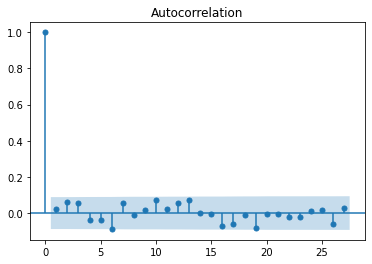

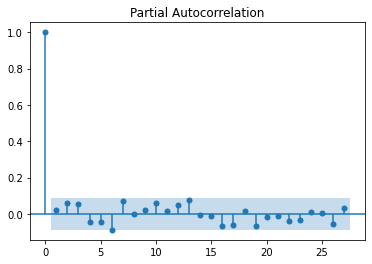

<Figure size 1440x864 with 0 Axes>

In [202]:
plot_acf(results_garch_1_2.resid)
plot_pacf(results_garch_1_2.resid)
plt.figure(figsize=(20,12))
plt.show()

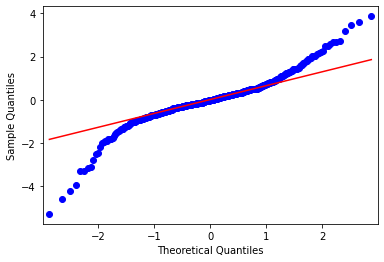

In [204]:
fig = qqplot(results_garch_1_2.resid, line='q', fit=True)

In [276]:
print(results_garch_1_2.aic, results_garch_1_2.bic)

-1703.6185852017452 -1682.6160393315317


In [207]:
model_garch_2_2 = arch_model(return_data.daily_return[1:],mean='Constant',vol='GARCH',p=2,q=2)

In [208]:
results_garch_2_2 = model_garch_2_2.fit()
results_garch_2_2.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: -860.8383606968371
Iteration:      2,   Func. Count:     22,   Neg. LLF: -860.9591970499113
Iteration:      3,   Func. Count:     34,   Neg. LLF: -860.9593175388195
Iteration:      4,   Func. Count:     44,   Neg. LLF: -861.2202949176603
Iteration:      5,   Func. Count:     54,   Neg. LLF: -862.4182161878382
Iteration:      6,   Func. Count:     63,   Neg. LLF: -864.0343486227163
Iteration:      7,   Func. Count:     72,   Neg. LLF: -864.2817539135269
Iteration:      8,   Func. Count:     81,   Neg. LLF: -864.3439872397039
Iteration:      9,   Func. Count:     90,   Neg. LLF: -864.3986441422976
Iteration:     10,   Func. Count:     99,   Neg. LLF: -864.4937538161123
Iteration:     11,   Func. Count:    109,   Neg. LLF: -864.5000731281253
Iteration:     12,   Func. Count:    118,   Neg. LLF: -864.533588771418
Iteration:     13,   Func. Count:    126,   Neg. LLF: -864.5391629880062
Iteration:     14,   Func. Count:    134,   Neg. LLF

C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:           daily_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                864.539
Distribution:                  Normal   AIC:                          -1717.08
Method:            Maximum Likelihood   BIC:                          -1691.88
                                        No. Observations:                  493
Date:                Sat, Dec 19 2020   Df Residuals:                      487
Time:                        23:03:28   Df Model:                            6
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.6202e-03  1.934e-03      2.388  1.692e-02 [8.289e-04,8.411e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.3753e-04  2.509e-04      1.744  8.116e-02 [-5.418e-05,9.292e-04]
alpha[1]       0.0606  3.594e-02      1.687  9.163e-02   [-9.815e-03,  0.131]
alpha[2]       0.1988      0.123      1.618      0.106   [-4.196e-02,  0.440]
beta[1]        0.4701      0.324      1.452      0.147      [ -0.165,  1.105]
beta[2]        0.0630      0.328      0.192      0.848      [ -0.580,  0.706]
=============================================================================

Covariance estimator: robust
"""

<AxesSubplot:title={'center':'garch_Residual'}>

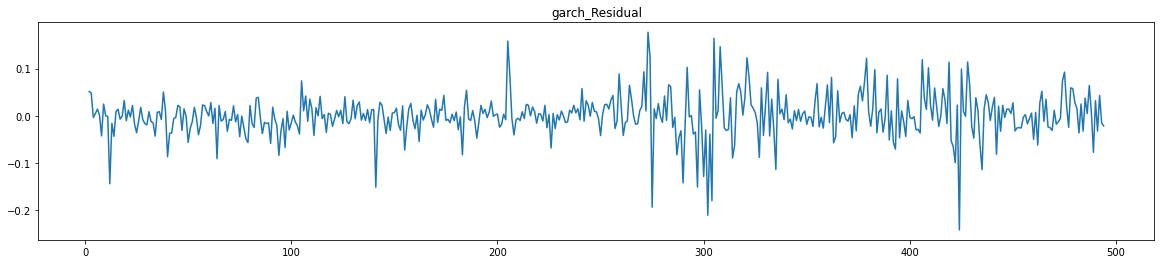

In [209]:
results_garch_2_2.resid.plot(figsize = (20, 4), title = 'garch_Residual')

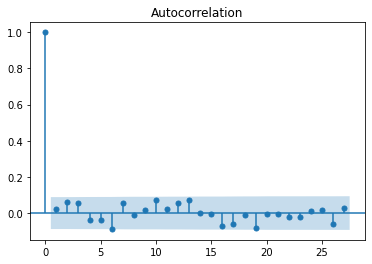

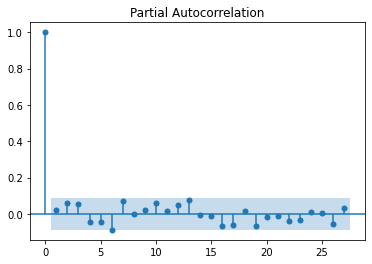

<Figure size 1440x864 with 0 Axes>

In [210]:
plot_acf(results_garch_2_2.resid)
plot_pacf(results_garch_2_2.resid)
plt.figure(figsize=(20,12))
plt.show()

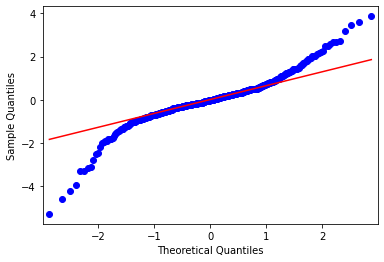

In [211]:
fig = qqplot(results_garch_2_2.resid, line='q', fit=True)

In [220]:
print(results_garch_2_2.aic, results_garch_2_2.bic)

-1717.0787795074286 -1691.8757244631724


In [213]:
model_garch_3_2 = arch_model(return_data.daily_return[1:],mean='Constant',vol='GARCH',p=3,q=2)

In [214]:
results_garch_3_2 = model_garch_3_2.fit()
results_garch_3_2.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: -859.1356112844048
Iteration:      2,   Func. Count:     24,   Neg. LLF: -859.2819157570133
Iteration:      3,   Func. Count:     38,   Neg. LLF: -859.9859660221526
Iteration:      4,   Func. Count:     49,   Neg. LLF: -861.1927061918136
Iteration:      5,   Func. Count:     59,   Neg. LLF: -863.642517058398
Iteration:      6,   Func. Count:     70,   Neg. LLF: -863.9434880685809
Iteration:      7,   Func. Count:     81,   Neg. LLF: -863.9585192934215
Iteration:      8,   Func. Count:     91,   Neg. LLF: -864.0363117304964
Iteration:      9,   Func. Count:    101,   Neg. LLF: -864.2114187972131
Iteration:     10,   Func. Count:    111,   Neg. LLF: -864.2797044928799
Iteration:     11,   Func. Count:    120,   Neg. LLF: -864.5913436188803
Iteration:     12,   Func. Count:    129,   Neg. LLF: -864.6446889939268
Iteration:     13,   Func. Count:    138,   Neg. LLF: -864.655830285259
Iteration:     14,   Func. Count:    147,   Neg. LLF:

C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:           daily_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                864.659
Distribution:                  Normal   AIC:                          -1715.32
Method:            Maximum Likelihood   BIC:                          -1685.92
                                        No. Observations:                  493
Date:                Sat, Dec 19 2020   Df Residuals:                      486
Time:                        23:06:26   Df Model:                            7
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.5335e-03  1.928e-03      2.351  1.871e-02 [7.546e-04,8.312e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.8092e-04  4.170e-04      1.633      0.102 [-1.364e-04,1.498e-03]
alpha[1]       0.0555  3.454e-02      1.606      0.108   [-1.223e-02,  0.123]
alpha[2]       0.2056      0.117      1.762  7.813e-02   [-2.315e-02,  0.434]
alpha[3]       0.1415  8.973e-02      1.577      0.115   [-3.438e-02,  0.317]
beta[1]    8.9486e-15      0.344  2.603e-14      1.000      [ -0.674,  0.674]
beta[2]        0.2765      0.241      1.148      0.251      [ -0.195,  0.748]
=============================================================================

Covariance estimator: robust
"""

<AxesSubplot:title={'center':'garch_Residual'}>

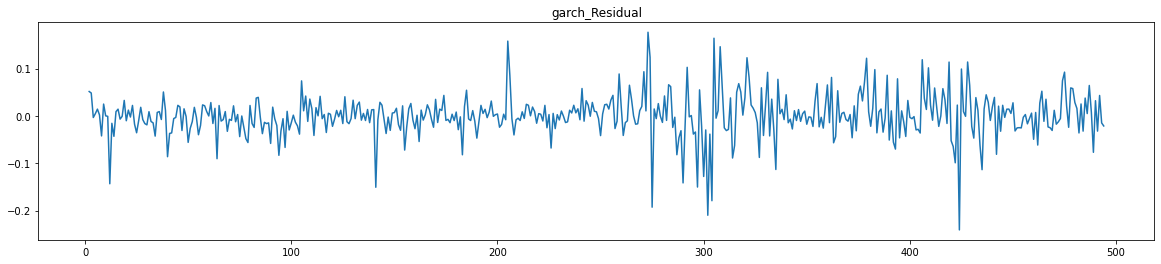

In [215]:
results_garch_3_2.resid.plot(figsize = (20, 4), title = 'garch_Residual')

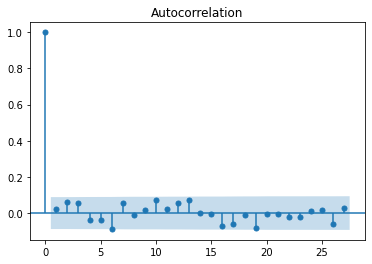

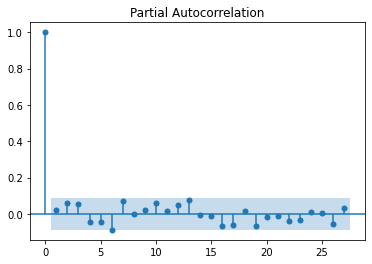

<Figure size 1440x864 with 0 Axes>

In [216]:
plot_acf(results_garch_3_2.resid)
plot_pacf(results_garch_3_2.resid)
plt.figure(figsize=(20,12))
plt.show()

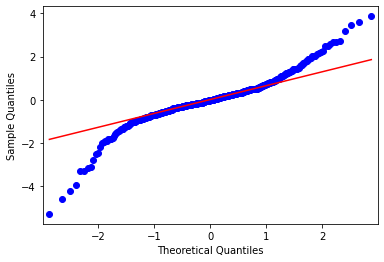

In [217]:
fig = qqplot(results_garch_3_2.resid, line='q', fit=True)

In [219]:
print(results_garch_3_2.aic, results_garch_3_2.bic)

-1715.3186648536907 -1685.9151006353918


In [229]:
best_garch = arch_model(return_data.daily_return[1:], vol= 'Garch').fit()
for p_num in range(1,4):
    for q_num in range(1,4):
        temp_garch = arch_model(return_data.daily_return[1:], vol= 'Garch', p = p_num , q = q_num).fit()
        if temp_garch.bic < best_garch.bic:
            best_garch = temp_garch
print('best_p,q',best_garch)

C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is 

Iteration:      1,   Func. Count:      6,   Neg. LLF: -859.9236684361776
Iteration:      2,   Func. Count:     18,   Neg. LLF: -859.9990962266609
Iteration:      3,   Func. Count:     29,   Neg. LLF: -859.999747862282
Iteration:      4,   Func. Count:     41,   Neg. LLF: -860.0003983263076
Iteration:      5,   Func. Count:     52,   Neg. LLF: -860.0010474038284
Iteration:      6,   Func. Count:     60,   Neg. LLF: -860.3064836359468
Iteration:      7,   Func. Count:     69,   Neg. LLF: -860.4953948586138
Iteration:      8,   Func. Count:     77,   Neg. LLF: -860.686021926596
Iteration:      9,   Func. Count:     84,   Neg. LLF: -860.71154292983
Iteration:     10,   Func. Count:     91,   Neg. LLF: -860.7408525079958
Iteration:     11,   Func. Count:    100,   Neg. LLF: -860.760913161146
Iteration:     12,   Func. Count:    108,   Neg. LLF: -860.7662714065893
Iteration:     13,   Func. Count:    115,   Neg. LLF: -860.7698659293393
Iteration:     14,   Func. Count:    121,   Neg. LLF: -8

C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


C:\ana3\envs\t_f2.2\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002095. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      7,   Neg. LLF: -861.2784822025499
Iteration:      2,   Func. Count:     20,   Neg. LLF: -861.3449682987057
Iteration:      3,   Func. Count:     30,   Neg. LLF: -861.3450945981433
Iteration:      4,   Func. Count:     42,   Neg. LLF: -861.359151949478
Iteration:      5,   Func. Count:     55,   Neg. LLF: -861.3749421507285
Iteration:      6,   Func. Count:     66,   Neg. LLF: -862.3249241155805
Iteration:      7,   Func. Count:     77,   Neg. LLF: -862.3325248187255
Iteration:      8,   Func. Count:     86,   Neg. LLF: -863.4274878537833
Iteration:      9,   Func. Count:     94,   Neg. LLF: -864.2612509405074
Iteration:     10,   Func. Count:    102,   Neg. LLF: -864.4128224436367
Iteration:     11,   Func. Count:    110,   Neg. LLF: -864.4272153922739
Iteration:     12,   Func. Count:    118,   Neg. LLF: -864.4790367585629
Iteration:     13,   Func. Count:    125,   Neg. LLF: -864.5049401000292
Iteration:     14,   Func. Count:    132,   Neg. LLF

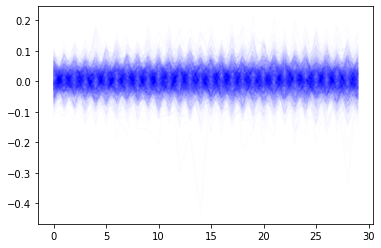

-0.06921160354593699


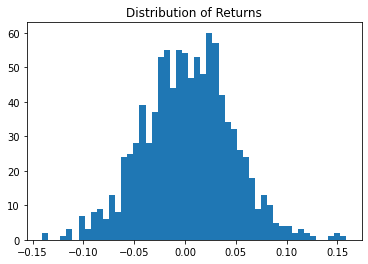

In [282]:
garch_fitted = model_garch_2_1.fit()
forecasts = garch_fitted.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()

print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()